<a href="https://colab.research.google.com/github/Roshan-Velpula/Machine-Learning-models-from-scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my new series on trying to code popular machine learning models from scrach. This for my better understanding about the models as a part of my learning journey.

#Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is a linear approach, meaning that it assumes a linear relationship between the variables.

In simple linear regression, there is only one independent variable, and the goal is to fit a straight line that best describes the relationship between that variable and the dependent variable. 

A linear regression is typically trained using the (mean) squared error (MSE) as a loss function. This computes a least squares solution. The mean squared error minimizes the sum of squared residuals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

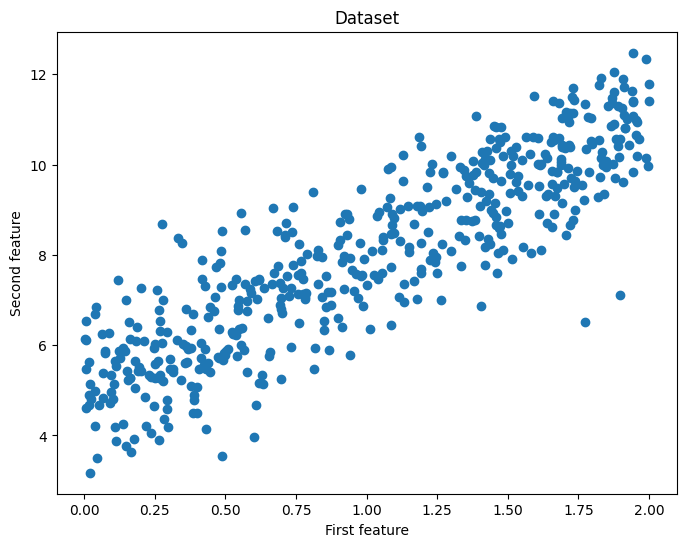

In [3]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
#Linear Regression Class

class LinearRegression:

  def __init__(self):
    pass
  
  def train_gradient(self,X, y, learning_rate = 0.01, n_iter = 100):

    n_samples , n_features = X.shape
    self.w = np.zeros(shape = (n_features,1))
    self.b = 0
    costs = []
    for i in range(n_iter):
      y_hat = np.dot(X,self.w) + self.b
      cost = (1/n_samples) * np.sum((y_hat - y)**2)
      costs.append(cost)

      d_dw = (2 / n_samples) * np.dot( X.T, (y_hat - y))

      d_db = (2 / n_samples) * np.sum(y_hat - y)

      self.w = self.w - (learning_rate * d_dw)
      self.b = self.b - (learning_rate * d_db)

      if i%100 == 0 :
        print(f"{i} iteration")

    return self.w , self.b, costs
  
  def train_equation( self, X,y):

    self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    self.b = 0

    return self.w , self.b

  def predict(self, X):

    y_predict = np.dot(X,self.w) + self.b

    return y_predict

#Testing our Linear regression class


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
linreg = LinearRegression()

In [7]:
w_train, b_train, costs_train = linreg.train_gradient(X_train, y_train, learning_rate = 0.0005, n_iter =  1000)

0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
500 iteration
600 iteration
700 iteration
800 iteration
900 iteration


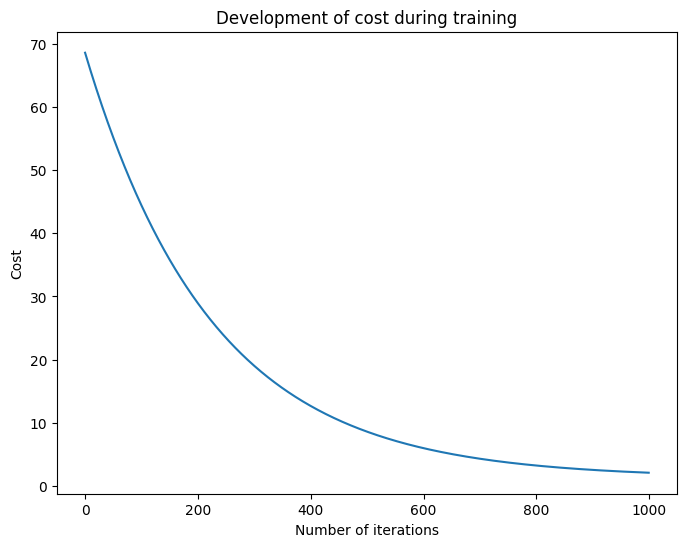

In [8]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1000), costs_train)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [9]:
y_test_preds = linreg.predict(X_test)

y_train_preds = linreg.predict(X_train)

In [10]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

error_train =  (1 / n_samples) * np.sum((y_train_preds - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_test_preds - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 2.109
Error on test set: 2.0


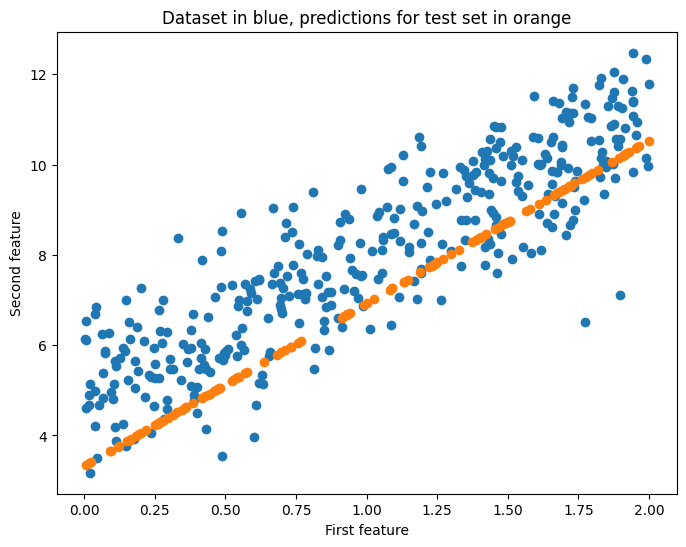

In [11]:
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test_preds)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

#Testing Normal Equation method.

In [13]:
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_equation(X_b_train, y_train)

In [14]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 0.9696
Error on test set: 0.8708
